In [7]:
import pandas as pd
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
from RandomForestForTimeSeriesRegressor import RandomForestForTimeSeriesRegressor, BLOCK_TYPES
from pyts.classification import TimeSeriesForest

In [8]:
dataset = pd.read_csv('../../datasets/sp_500_stocks/sp500_stocks.csv') #, nrows=1000000)

In [9]:
dataset = dataset.dropna()
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,2010-01-04,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
22525,2010-01-05,AMD,9.710000,9.710000,9.900000,9.680000,9.710000,22145700.0
22526,2010-01-06,AMD,9.570000,9.570000,9.760000,9.550000,9.680000,18643400.0
22527,2010-01-07,AMD,9.470000,9.470000,9.550000,9.180000,9.510000,26806800.0
22528,2010-01-08,AMD,9.430000,9.430000,9.470000,9.290000,9.370000,13752800.0
...,...,...,...,...,...,...,...,...
1880749,2024-11-25,ZBRA,400.940002,400.940002,404.320007,398.130005,400.029999,420200.0
1880750,2024-11-26,ZBRA,402.450012,402.450012,403.570007,399.690002,402.440002,369200.0
1880751,2024-11-27,ZBRA,405.750000,405.750000,406.140015,400.929993,403.730011,258300.0
1880752,2024-11-29,ZBRA,407.000000,407.000000,409.029999,405.510010,406.640015,175700.0


In [10]:
dataset = dataset.sort_values("Date")
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,2010-01-04,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
37540,2010-01-04,APD,53.128727,76.928772,77.021278,75.587418,75.957443,1131483.0
1152478,2010-01-04,MKC,13.617592,18.150000,18.205000,18.030001,18.205000,980000.0
255272,2010-01-04,BKNG,222.359650,223.960007,225.300003,221.580002,222.320007,863200.0
469250,2010-01-04,CPRT,2.275625,2.275625,2.308750,2.271875,2.295625,4688000.0
...,...,...,...,...,...,...,...,...
874681,2024-12-02,HLT,250.470001,250.470001,254.335007,249.606293,253.440002,805471.0
889697,2024-12-02,HRL,32.139999,32.139999,32.480000,31.850000,32.480000,3019392.0
893451,2024-12-02,HST,18.389999,18.389999,18.590000,18.270000,18.490000,4656098.0
814617,2024-12-02,GM,55.040001,55.040001,55.619999,54.689999,55.500000,9200689.0


In [11]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = dataset['Date'].map(dt.datetime.toordinal)
dataset

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
22524,733776,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
37540,733776,APD,53.128727,76.928772,77.021278,75.587418,75.957443,1131483.0
1152478,733776,MKC,13.617592,18.150000,18.205000,18.030001,18.205000,980000.0
255272,733776,BKNG,222.359650,223.960007,225.300003,221.580002,222.320007,863200.0
469250,733776,CPRT,2.275625,2.275625,2.308750,2.271875,2.295625,4688000.0
...,...,...,...,...,...,...,...,...
874681,739222,HLT,250.470001,250.470001,254.335007,249.606293,253.440002,805471.0
889697,739222,HRL,32.139999,32.139999,32.480000,31.850000,32.480000,3019392.0
893451,739222,HST,18.389999,18.389999,18.590000,18.270000,18.490000,4656098.0
814617,739222,GM,55.040001,55.040001,55.619999,54.689999,55.500000,9200689.0


In [12]:
dataset = dataset.drop(columns=['Adj Close', "Volume"])
dataset = dataset.loc[(dataset['Symbol'] == "TRV")]
dataset

,Date,Symbol,Close,High,Low,Open
1696808,733776,TRV,49.810001,50.439999,49.660000,50.150002
1696809,733777,TRV,48.630001,49.689999,48.520000,49.630001
1696810,733778,TRV,47.939999,48.389999,47.349998,48.259998
1696811,733779,TRV,48.630001,48.849998,47.820000,47.820000
1696812,733780,TRV,48.560001,48.759998,48.070000,48.650002
...,...,...,...,...,...,...
1700557,739215,TRV,261.220001,266.160004,260.709991,263.600006
1700558,739216,TRV,263.769989,264.119995,260.070007,262.700012
1700559,739217,TRV,266.660004,268.309998,264.809998,264.809998
1700560,739219,TRV,266.040009,269.049988,266.040009,269.000000


In [13]:
from sklearn import preprocessing

dataset['Symbol'] = pd.factorize(dataset.Symbol)[0]
# symbols = new_df[['SymbolFac', 'Symbol']].copy()
# Y = new_df.pop("Symbol")
# min_max_scaler = preprocessing.MinMaxScaler()
# scaled_data = min_max_scaler.fit_transform(new_df)
# normalized_dataset = pd.DataFrame(scaled_data)
# dataset_X = dataset[['Date', 'Symbol']].copy()
# dataset_Y = dataset.drop(['Date', 'Symbol'], axis=1)
#
dataset

,Date,Symbol,Close,High,Low,Open
1696808,733776,0,49.810001,50.439999,49.660000,50.150002
1696809,733777,0,48.630001,49.689999,48.520000,49.630001
1696810,733778,0,47.939999,48.389999,47.349998,48.259998
1696811,733779,0,48.630001,48.849998,47.820000,47.820000
1696812,733780,0,48.560001,48.759998,48.070000,48.650002
...,...,...,...,...,...,...
1700557,739215,0,261.220001,266.160004,260.709991,263.600006
1700558,739216,0,263.769989,264.119995,260.070007,262.700012
1700559,739217,0,266.660004,268.309998,264.809998,264.809998
1700560,739219,0,266.040009,269.049988,266.040009,269.000000


In [14]:
trainPercent = 80
trainSamples = (len(dataset.index) // 100) * trainPercent
testSamples = len(dataset.index) - trainSamples

In [15]:
aux = dataset.copy()

X = aux[['Date', 'Symbol']].copy()
aux = aux.drop(['Date', 'Symbol'], axis=1)

Y = aux.copy()
#dataset = aux

X_train = X.iloc[:trainSamples]
Y_train = Y.iloc[:trainSamples]
X_test = X.iloc[-testSamples:]
Y_test = Y.iloc[-testSamples:]

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
#
#X_train = X_train.values.reshape(-1, 1)
#X_test = X_test.values.reshape(-1, 1)
X_train

,Date,Symbol
1696808,733776,0
1696809,733777,0
1696810,733778,0
1696811,733779,0
1696812,733780,0
...,...,...
1699763,738062,0
1699764,738063,0
1699765,738064,0
1699766,738067,0


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

basicRFPrecision = []
for i in range(50):
    basicRF = RandomForestRegressor(n_jobs=100, n_estimators=500, max_depth=10)
    basicRF.fit(X_train, Y_train)
    y_pred = basicRF.predict(X_test)
    rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
    print(f"RMSE:")
    print(rmse0)
    basicRFPrecision.append(rmse0)

RMSE:
43.14885568082728
RMSE:
43.12020819073557
RMSE:
43.13360788608222
RMSE:
43.088797647590575
RMSE:
43.100719873797836
RMSE:
43.133458169706884
RMSE:
43.07396467708693
RMSE:
43.073725081915505
RMSE:
43.100728179564676
RMSE:
43.115241334489355
RMSE:
43.06526269546065
RMSE:
43.12924134420323
RMSE:
43.069603367423454
RMSE:
43.13637146277354
RMSE:
43.13721021493483
RMSE:
43.135756974155406
RMSE:
43.134149246913665
RMSE:
43.14204089368258
RMSE:
43.09882442609638
RMSE:
43.10658597961315
RMSE:
43.07392155368575
RMSE:
43.09125552256904
RMSE:
43.07315292558797
RMSE:
43.1046683187522
RMSE:
43.123299484708554
RMSE:
43.112812959726625
RMSE:
43.072823802096956
RMSE:
43.13569319917459
RMSE:
43.078851039126896
RMSE:
43.120805121595424
RMSE:
43.133109928953196
RMSE:
43.12197325216715
RMSE:
43.12496845341917
RMSE:
43.093430331590916
RMSE:
43.09158603587162
RMSE:
43.11319506871315
RMSE:
43.0972473825475
RMSE:
43.1643701387892
RMSE:
43.100806560567044
RMSE:
43.08715883830805
RMSE:
43.087906113861045
R

In [17]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [18]:
precisionNonOverlapping = dict()
for i in [100, 200, 300]:
    precisionNonOverlapping[i] = []
    block_size = i #int(count_row // i)
    for k in range(10):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, block_size=block_size, max_depth=10)
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        print(f"RMSE: ({i}, {k})")
        print(rmse0)
        precisionNonOverlapping[i].append(rmse0)

RMSE: (100, 0)
46.122538891581506
RMSE: (100, 1)
45.23884691206153
RMSE: (100, 2)
44.918464815906745
RMSE: (100, 3)
45.74226398703405
RMSE: (100, 4)
45.200733836238435
RMSE: (100, 5)
45.87546888072698
RMSE: (100, 6)
45.22420815827327
RMSE: (100, 7)
44.607318973085
RMSE: (100, 8)
46.347286591917474
RMSE: (100, 9)
45.476466105800135
RMSE: (200, 0)
51.52589998311064
RMSE: (200, 1)
50.853971465698294
RMSE: (200, 2)
52.17265459407468
RMSE: (200, 3)
51.074326843883384
RMSE: (200, 4)
51.65191299969523
RMSE: (200, 5)
53.25789208170438
RMSE: (200, 6)
51.215833317533686
RMSE: (200, 7)
50.40445666545443
RMSE: (200, 8)
51.32592050218403
RMSE: (200, 9)
51.18433248615317
RMSE: (300, 0)
54.873442606987545
RMSE: (300, 1)
55.156969443773704
RMSE: (300, 2)
55.49352317964467
RMSE: (300, 3)
54.16536812503819
RMSE: (300, 4)
54.50618450548578
RMSE: (300, 5)
54.4558883419369
RMSE: (300, 6)
54.48422235853476
RMSE: (300, 7)
54.107866970168814
RMSE: (300, 8)
53.17175811993204
RMSE: (300, 9)
55.07727306499495


([<matplotlib.axis.XTick at 0x1ff8b70ca90>,
 [Text(0, 0, '100'),
  Text(1, 0, '200'),
  Text(2, 0, '300'),
  Text(3, 0, 'Random Forest')])

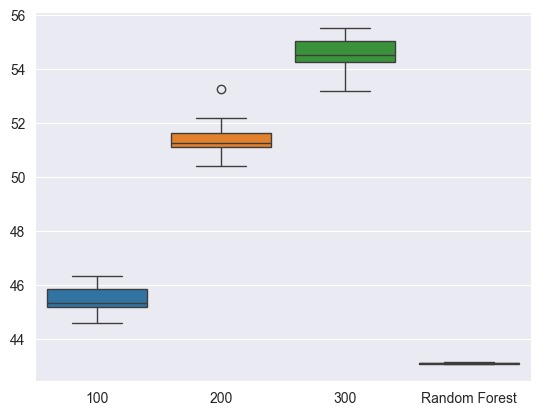

In [19]:
data1 = []
for r in precisionNonOverlapping[100]:
    data1.append(r)
data2 = []
for r in precisionNonOverlapping[200]:
    data2.append(r)
data3 = []
for r in precisionNonOverlapping[300]:
    data3.append(r)

all_arr = [data1,
           data2,
           data3,
           basicRFPrecision]
sns.boxplot(data=all_arr)
plt.xticks([0, 1, 2, 3], ["100", "200", "300", "Random Forest"])

In [21]:
precisionNonOverlapping = dict()
for i in [100, 300, 500, 1000, 2000]:
    precisionNonOverlapping[i] = []
    block_size = i #int(count_row // i)
    for k in range(50):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, block_size=block_size, max_depth=10)
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        print(f"RMSE: ({i}, {k})")
        print(rmse0)
        precisionNonOverlapping[i].append(rmse0)

RMSE: (100, 0)
44.669218769502024
RMSE: (100, 1)
44.91459942734057
RMSE: (100, 2)
45.1403449403523
RMSE: (100, 3)
45.40496132447512
RMSE: (100, 4)
45.699442383285046
RMSE: (100, 5)
45.5013308669609
RMSE: (100, 6)
44.877834777633495
RMSE: (100, 7)
45.512510236379214
RMSE: (100, 8)
45.00424592915651
RMSE: (100, 9)
45.213196346825036
RMSE: (100, 10)
45.411742287526124
RMSE: (100, 11)
44.55672661020304
RMSE: (100, 12)
45.35835171809909
RMSE: (100, 13)
45.337832418626846
RMSE: (100, 14)
45.548541150788814
RMSE: (100, 15)
44.995656584926074
RMSE: (100, 16)
45.52497279628383
RMSE: (100, 17)
44.948570394685575
RMSE: (100, 18)
44.808976607227656
RMSE: (100, 19)
45.693782122875604
RMSE: (100, 20)
45.05849230949214
RMSE: (100, 21)
45.678647248291725
RMSE: (100, 22)
46.133983902652844
RMSE: (100, 23)
45.33368287204695
RMSE: (100, 24)
44.7452849439658
RMSE: (100, 25)
45.218406934268536
RMSE: (100, 26)
44.6672398525843
RMSE: (100, 27)
45.33974281820413
RMSE: (100, 28)
45.46740127013703
RMSE: (100, 2

Text(0, 0.5, 'RMSE')

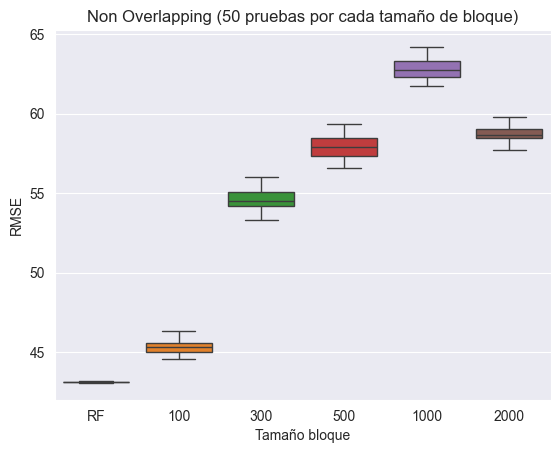

In [22]:
from matplotlib import pyplot as plt

data0 = []
for r in precisionNonOverlapping[100]:
    data0.append(r)
data1 = []
for r in precisionNonOverlapping[300]:
    data1.append(r)
data2 = []
for r in precisionNonOverlapping[500]:
    data2.append(r)
data3 = []
for r in precisionNonOverlapping[1000]:
    data3.append(r)
data4 = []
for r in precisionNonOverlapping[2000]:
    data4.append(r)
data5 = []
# for r in precisionNonOverlapping[4000]:
#     data5.append(r)
# data6 = []
# for r in precisionNonOverlapping[5000]:
#     data6.append(r)

all_arr = [basicRFPrecision,
           data0,
           data1,
           data2,
           data3,
           data4]
sns.boxplot(data=all_arr)
plt.xticks([0, 1, 2, 3, 4, 5], ["RF", "100", "300", "500", "1000", "2000"])
plt.title("Non Overlapping (50 pruebas por cada tamaño de bloque)")
plt.xlabel("Tamaño bloque")
plt.ylabel("RMSE")

In [23]:
precisionMovingBlock = dict()
for i in [100, 300, 500, 1000, 2000]:
    precisionMovingBlock[i] = []
    block_size = i #int(count_row // i)
    for k in range(50):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, block_size=block_size, max_depth=10, block_type=BLOCK_TYPES[1])
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        print(f"RMSE: ({i}, {k})")
        print(rmse0)
        precisionMovingBlock[i].append(rmse0)

RMSE: (100, 0)
47.427038779041986
RMSE: (100, 1)
48.59676505540998
RMSE: (100, 2)
47.47233459088995
RMSE: (100, 3)
48.41132876640303
RMSE: (100, 4)
48.35801306004172
RMSE: (100, 5)
48.59063335480408
RMSE: (100, 6)
47.61171241359875
RMSE: (100, 7)
46.76207035719882
RMSE: (100, 8)
46.831797528993576
RMSE: (100, 9)
47.11238850349452
RMSE: (100, 10)
47.5035389675408
RMSE: (100, 11)
47.673493181705325
RMSE: (100, 12)
47.52566490394797
RMSE: (100, 13)
47.47076195951574
RMSE: (100, 14)
47.820867659783396
RMSE: (100, 15)
48.19298207362521
RMSE: (100, 16)
47.737365185737374
RMSE: (100, 17)
47.427426032326174
RMSE: (100, 18)
48.537977401646145
RMSE: (100, 19)
47.316323393971786
RMSE: (100, 20)
48.755467075742246
RMSE: (100, 21)
48.0944978498054
RMSE: (100, 22)
46.79300569955139
RMSE: (100, 23)
47.36969015621052
RMSE: (100, 24)
48.8823231292859
RMSE: (100, 25)
47.56773503423897
RMSE: (100, 26)
47.67910565092879
RMSE: (100, 27)
47.720396816803095
RMSE: (100, 28)
47.469945579287014
RMSE: (100, 29)


Text(0, 0.5, 'RMSE')

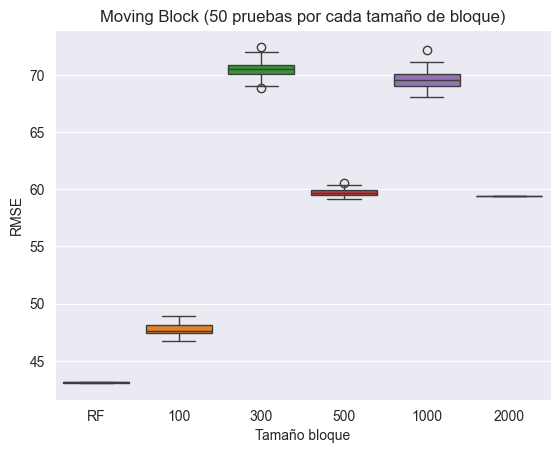

In [24]:
data0 = []
for r in precisionMovingBlock[100]:
    data0.append(r)
data1 = []
for r in precisionMovingBlock[300]:
    data1.append(r)
data2 = []
for r in precisionMovingBlock[500]:
    data2.append(r)
data3 = []
for r in precisionMovingBlock[1000]:
    data3.append(r)
data4 = []
for r in precisionMovingBlock[2000]:
    data4.append(r)

all_arr1 = [basicRFPrecision,
           data0,
           data1,
           data2,
           data3,
           data4]
sns.boxplot(data=all_arr1)
plt.xticks([0, 1, 2, 3, 4, 5], ["RF", "100", "300", "500", "1000", "2000"])
plt.title("Moving Block (50 pruebas por cada tamaño de bloque)")
plt.xlabel("Tamaño bloque")
plt.ylabel("RMSE")

In [25]:
precisionCircularBlock = dict()
for i in [100, 300, 500, 1000, 2000]:
    precisionCircularBlock[i] = []
    block_size = i #int(count_row // i)
    for k in range(50):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, block_size=block_size, max_depth=10, block_type=BLOCK_TYPES[2])
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        print(f"RMSE: ({i}, {k})")
        print(rmse0)
        precisionCircularBlock[i].append(rmse0)

RMSE: (100, 0)
44.925364395855226
RMSE: (100, 1)
45.319550067360666
RMSE: (100, 2)
45.636233326647776
RMSE: (100, 3)
45.54174937829737
RMSE: (100, 4)
46.09283855279106
RMSE: (100, 5)
46.142285604343385
RMSE: (100, 6)
45.68725657884533
RMSE: (100, 7)
46.40524377414899
RMSE: (100, 8)
45.853965371556164
RMSE: (100, 9)
45.65295467219224
RMSE: (100, 10)
45.21793513538652
RMSE: (100, 11)
45.26892375743963
RMSE: (100, 12)
46.11371022390677
RMSE: (100, 13)
45.83868934858106
RMSE: (100, 14)
45.58330562452015
RMSE: (100, 15)
46.2925964316438
RMSE: (100, 16)
45.80559714488611
RMSE: (100, 17)
45.74189389161111
RMSE: (100, 18)
45.260300485280744
RMSE: (100, 19)
45.69248333359875
RMSE: (100, 20)
45.90626838630844
RMSE: (100, 21)
46.05776571800321
RMSE: (100, 22)
45.54260128607231
RMSE: (100, 23)
46.362761047867785
RMSE: (100, 24)
45.24432691405648
RMSE: (100, 25)
46.19404065504899
RMSE: (100, 26)
45.444347341218496
RMSE: (100, 27)
46.19247339193417
RMSE: (100, 28)
46.3131603870563
RMSE: (100, 29)
46

Text(0, 0.5, 'RMSE')

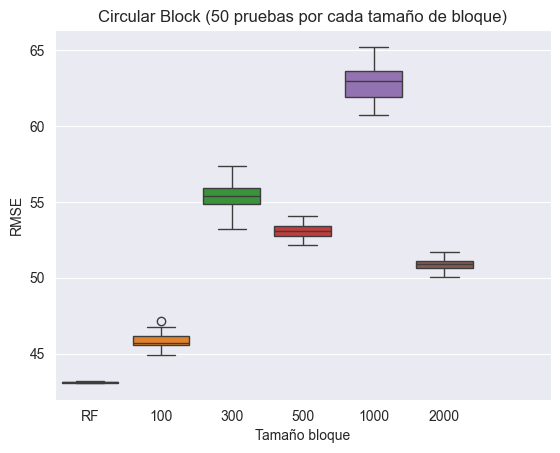

In [26]:
data0 = []
for r in precisionCircularBlock[100]:
    data0.append(r)
data1 = []
for r in precisionCircularBlock[300]:
    data1.append(r)
data2 = []
for r in precisionCircularBlock[500]:
    data2.append(r)
data3 = []
for r in precisionCircularBlock[1000]:
    data3.append(r)
data4 = []
for r in precisionCircularBlock[2000]:
    data4.append(r)

all_arr2 = [basicRFPrecision,
           data0,
           data1,
           data2,
           data3,
           data4,
           data5]
sns.boxplot(data=all_arr2)
plt.xticks([0, 1, 2, 3, 4, 5], ["RF", "100", "300", "500", "1000", "2000"])
plt.title("Circular Block (50 pruebas por cada tamaño de bloque)")
plt.xlabel("Tamaño bloque")
plt.ylabel("RMSE")

Text(49.347222222222214, 0.5, 'RMSE')

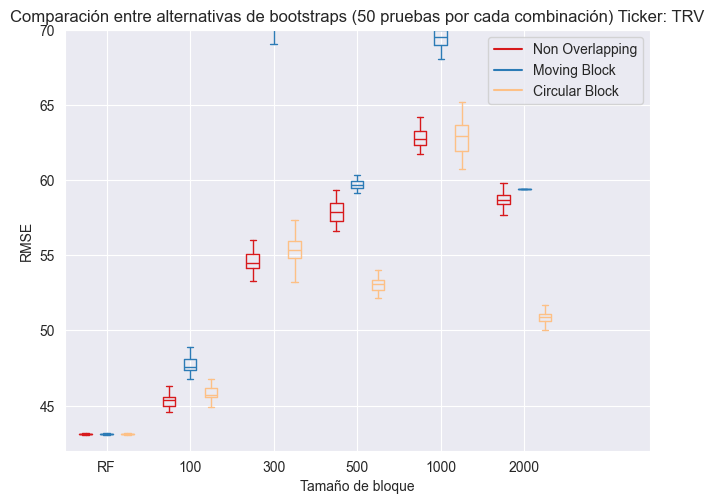

In [32]:
import numpy as np

ticks = ["RF", "100", "300", "500", "1000", "2000"]
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bp0 = plt.boxplot(all_arr, positions=np.array(range(len(all_arr)))*2.0-0.5, sym='', widths=0.3)
bp1 = plt.boxplot(all_arr1, positions=np.array(range(len(all_arr1)))*2.0, sym='', widths=0.3)
bp2 = plt.boxplot(all_arr2, positions=np.array(range(len(all_arr2)))*2.0+0.5, sym='', widths=0.3)
set_box_color(bp0, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp1, '#2C7BB6')
set_box_color(bp2, '#fdc086')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Non Overlapping')
plt.plot([], c='#2C7BB6', label='Moving Block')
plt.plot([], c='#fdc086', label='Circular Block')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
# plt.xlim(-2, len(ticks)*2)
plt.ylim(42, 70)
plt.tight_layout()
plt.title("Comparación entre alternativas de bootstraps (50 pruebas por cada combinación) Ticker: TRV")
plt.xlabel("Tamaño de bloque")
plt.ylabel("RMSE")